In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [4]:
csv_file_path = "/Users/rushil/POCUS_B-Line_Prediction/create_image_metrics/NHANES/nhanes_data.csv"
data = pd.read_csv(csv_file_path)

In [5]:
data_above_50 = data[data['age'] > 50].copy()
print(data_above_50[['TMIMS', 'event']].describe())

              TMIMS        event
count   4121.000000  4112.000000
mean   12052.607262     0.182150
std     3806.499701     0.386015
min     1072.906700     0.000000
25%     9421.107300     0.000000
50%    11861.754600     0.000000
75%    14485.713700     0.000000
max    36562.950400     1.000000


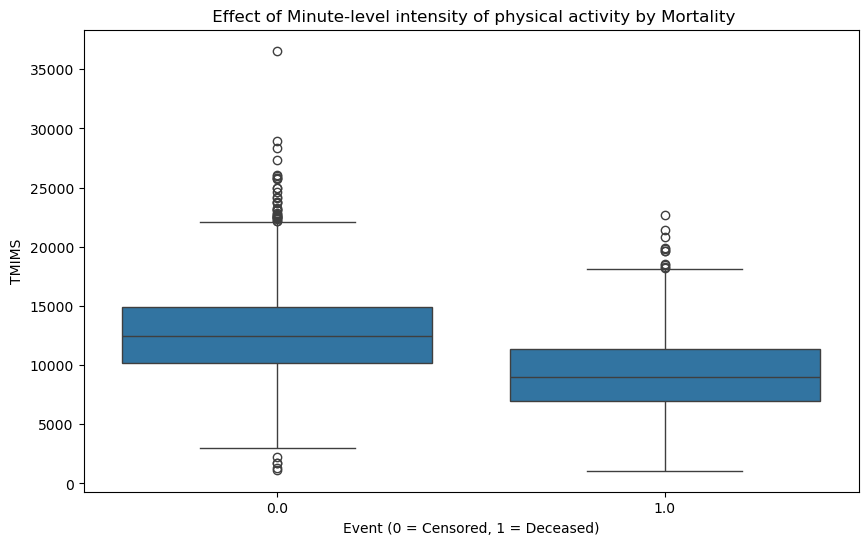

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='event', y='TMIMS', data=data_above_50)
plt.title(' Effect of Minute-level intensity of physical activity by Mortality')
plt.xlabel('Event (0 = Censored, 1 = Deceased)')
plt.ylabel('TMIMS')
plt.show()

In [7]:
missing_values = data_above_50['event'].isna().sum()
print(f"Number of missing values in the target variable 'event': {missing_values}")

Number of missing values in the target variable 'event': 9


In [8]:
data_above_50 = data_above_50.dropna(subset=['event'])

In [9]:
data_above_50

,SEQN,event,time,age,gender,race,BMI,PIR,CHD,education,...,MIMS_sd.MIN1431,MIMS_sd.MIN1432,MIMS_sd.MIN1433,MIMS_sd.MIN1434,MIMS_sd.MIN1435,MIMS_sd.MIN1436,MIMS_sd.MIN1437,MIMS_sd.MIN1438,MIMS_sd.MIN1439,MIMS_sd.MIN1440
9,62174,1.0,21.0,80,Male,Non-Hispanic White,33.9,4.30,No,More than high school,...,10.875000,17.793320,9.835315,10.572410,6.426294,10.789820,4.535903,8.760173,9.727197,13.331880
10,62177,0.0,85.0,51,Male,Non-Hispanic Asian,20.1,NaN,No,High school equivalent,...,3.733011,4.487289,9.606955,7.407028,9.075878,7.396669,8.899713,9.577588,6.249161,9.992094
11,62178,1.0,7.0,80,Male,Non-Hispanic White,28.5,0.05,No,High school equivalent,...,0.259663,3.504392,0.965036,0.282831,0.127322,0.098947,0.072046,0.090435,0.114058,1.524701
18,62191,0.0,99.0,70,Male,Non-Hispanic Black,NaN,0.90,No,High school equivalent,...,4.752775,5.506508,3.854844,4.397613,2.832688,4.465698,6.962854,5.248196,5.261039,1.054424
23,62199,0.0,84.0,57,Male,Non-Hispanic White,28.0,5.00,No,More than high school,...,0.014176,0.197224,0.408792,7.955597,3.411658,8.846266,0.445634,0.088667,0.009764,0.268171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12597,83708,0.0,84.0,64,Male,Non-Hispanic White,49.4,2.09,No,High school equivalent,...,6.448347,6.738681,7.299717,8.215647,11.022760,7.137843,6.778507,3.557842,3.357567,2.450616
12600,83712,0.0,69.0,61,Male,Non-Hispanic White,30.0,2.04,No,Less than high school,...,10.784270,9.816112,11.177820,11.079830,12.252650,11.955360,10.453310,12.762010,13.122660,11.344590
12602,83717,0.0,60.0,80,Female,Mexican American,21.3,0.70,No,Less than high school,...,11.653910,12.439180,9.975590,11.400270,8.242166,7.413230,6.647889,3.268139,7.267793,10.372010
12603,83723,0.0,82.0,61,Male,Mexican American,33.1,3.53,No,Less than high school,...,0.000000,0.000000,0.000000,0.000000,0.176836,0.031843,4.026961,7.540754,10.501300,3.132307


In [10]:
X = data_above_50[['TMIMS']]
Y = data_above_50['event']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train

,TMIMS
4277,12312.7180
8905,12933.1999
640,9826.0111
5336,4661.4489
190,8125.0416
...,...
10493,12475.4152
1370,8890.2807
9381,12133.3665
11572,13954.5829


In [11]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [12]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.0573625 , 0.17063514, 0.18590522, ..., 0.20952546, 0.11636421,
       0.19605406])

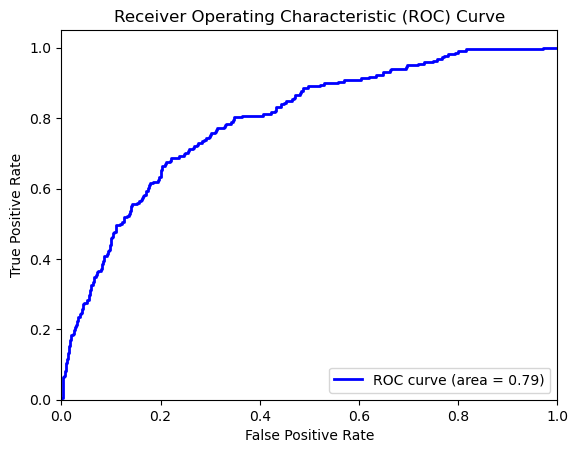

In [13]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
data_above_50 = data[data['age'] > 50].copy()  # Using .copy() to avoid SettingWithCopyWarning
data_above_50.loc[:, 'gender_encoded'] = data_above_50['gender'].map({'Female': 0, 'Male': 1})

In [15]:
X = data_above_50[['TMIMS', 'gender_encoded']]
Y = data_above_50['event']

# Check for missing values and handle them
Y = Y.dropna()
X = X.loc[Y.index]

X = X.dropna()
Y = Y.loc[X.index]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [17]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [18]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)

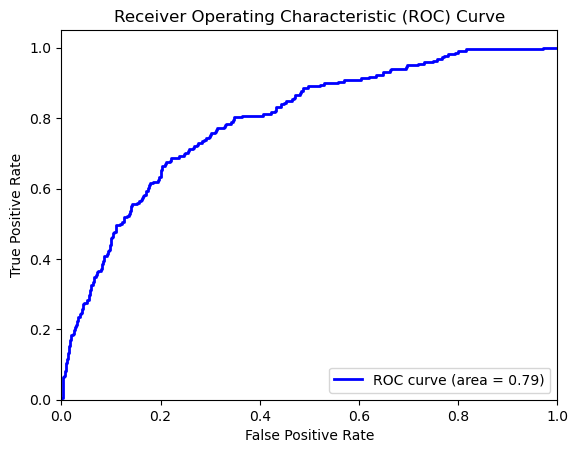

In [19]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
X = data_above_50[['TMIMS', 'gender_encoded', 'age']]
Y = data_above_50['event']

# Check for missing values and handle them
Y = Y.dropna()
X = X.loc[Y.index]

X = X.dropna()
Y = Y.loc[X.index]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

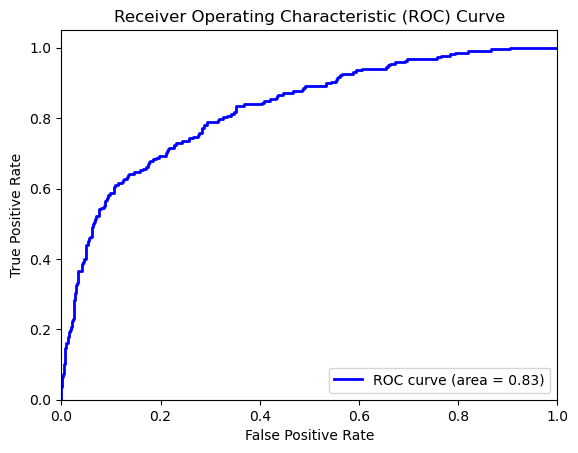

In [22]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
X = data_above_50[['TMIMS', 'gender_encoded', 'age', 'BMI']]
Y = data_above_50['event']

# Check for missing values and handle them
Y = Y.dropna()
X = X.loc[Y.index]

X = X.dropna()
Y = Y.loc[X.index]

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

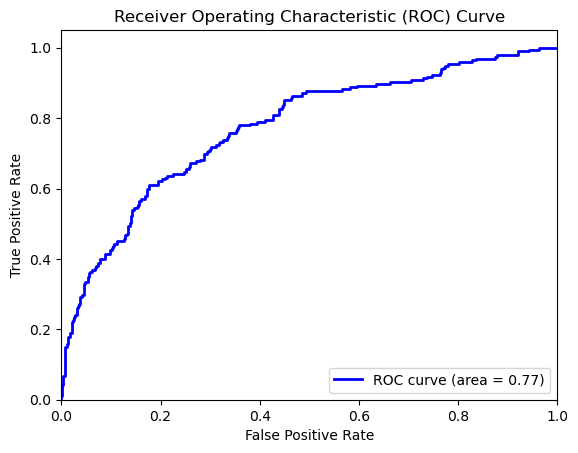

In [25]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc = roc_auc_score(Y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
accuracy = model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.852796052631579


In [27]:
coefficients_model = model.coef_
intercept_model = model.intercept_
print("Coefficients of Model:", coefficients_model, "Intercepts of Model:", intercept_model)


Coefficients of Model: [[-2.52609291e-04  3.41421708e-01  5.21168224e-02 -5.35675727e-02]] Intercepts of Model: [-0.90483172]


In [28]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[988  33]
 [146  49]]


In [29]:
TN = 988
FP = 33
FN = 146
TP = 49

accuracy = (TN + TP) / (TN + FP + FN + TP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.852796052631579
Precision: 0.5975609756097561
Recall: 0.2512820512820513
F1-Score: 0.35379061371841153
